In [1]:
%load_ext autoreload

In [2]:
%autoreload
import torch
import torch.nn as nn
import torchvision
import numpy as np
from gpt.model import ViT, Lambda, LightningWrapper
from gpt.alt_model import ViT as AltViT
from gpt.data import MNISTDataModule, CIFAR10DataModule
from tqdm.auto import tqdm
import lightning.pytorch as pl
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from rich.progress import track

In [13]:
mnist = MNISTDataModule(root_dir='/mnt/home/jshen/ceph/data/ml', num_workers=4, batch_size=8)
mnist.setup()

In [14]:
tl = mnist.test_dataloader()

/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
x, y = next(iter(tl))

In [7]:
model = LightningWrapper.load_from_checkpoint('../train/lightning_logs/version_2984103/checkpoints/epoch=24-step=2950.ckpt')

/mnt/home/jshen/miniconda3/envs/main/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'output_head' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_head'])`.


In [8]:
# model.load_state_dict(state_dict)
# model.eval();
model.freeze()

In [16]:
def show(imgs, **kwargs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = TF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img), **kwargs)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

(None, tensor([4, 1, 1, 4, 0, 3, 3, 7]))

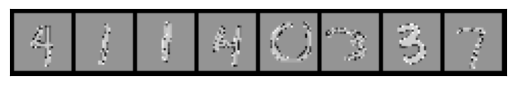

In [21]:
show(torchvision.utils.make_grid(x)), y

In [22]:
torch.argmax(model(x), 1)

tensor([4, 1, 4, 4, 6, 2, 2, 7])

In [18]:
score = 0
total = 0
for x, y in track(tl, total=len(tl)):
    with torch.no_grad():
        out = model(x)
        pred = torch.argmax(out, 1)
    score += torch.sum(pred == y)
    total += x.shape[0]

Working... ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   4% 0:22:59

KeyboardInterrupt: 

In [299]:
score / total

tensor(0.9138)